TELEA

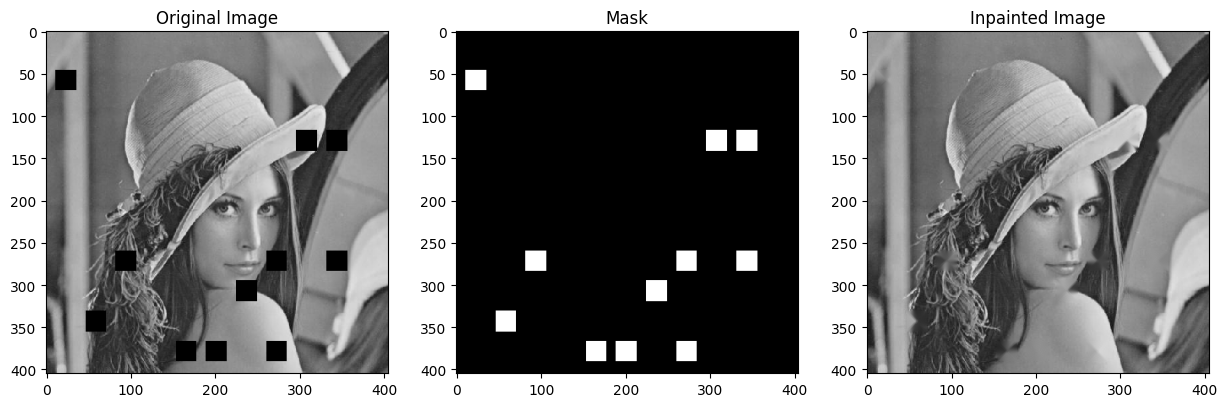

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_mask(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary mask
    # Assuming the damaged regions are black lines
    _, mask = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY_INV)

    # Optional: Refine the mask (e.g., using morphological operations)
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask

# Load the damaged image
image_path = 'damaged_cube.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create the mask
mask = create_mask(image)

# Perform harmonic inpainting using OpenCV's inpaint function with INPAINT_TELEA
inpainted_image = cv2.inpaint(image_rgb, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Inpainted Image')
plt.imshow(inpainted_image)
plt.show()


TELEA bigger object

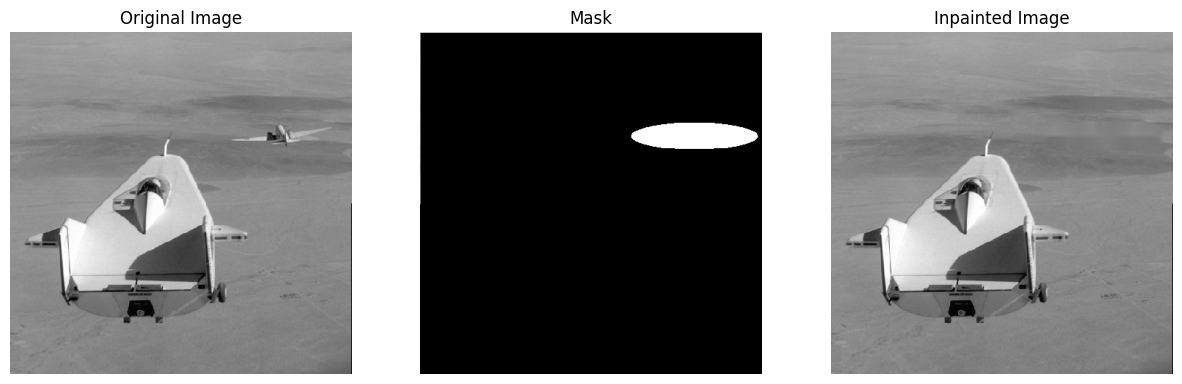

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_large_object(image_path, mask_path):
    # Load the image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the mask is binary (0 and 255)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Inpaint the segmented regions
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return inpainted_image

# Example usage
image_path = "airplane.png"  # Replace with the path to your image with the large object
mask_path = "airplane_mask.png"  # Replace with the path to the mask image
inpainted_image = remove_large_object(image_path, mask_path)

# Load the original image, mask, and inpainted image
original_image = cv2.imread(image_path)
mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Inpainted Image')
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


Objek lebih besar lagi

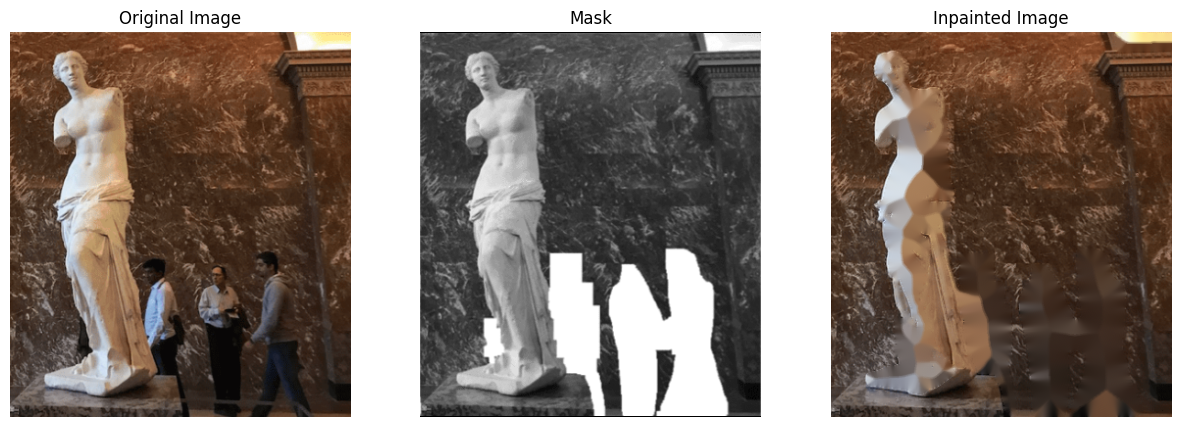

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_large_object(image_path, mask_path):
    # Load the image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the mask is binary (0 and 255)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Inpaint the segmented regions
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return inpainted_image

# Example usage
image_path = "remove_people.png"  # Replace with the path to your image with the large object
mask_path = "remove_people_mask.png"  # Replace with the path to the mask image
inpainted_image = remove_large_object(image_path, mask_path)

# Load the original image, mask, and inpainted image
original_image = cv2.imread(image_path)
mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Inpainted Image')
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


TELEA to restore old photo

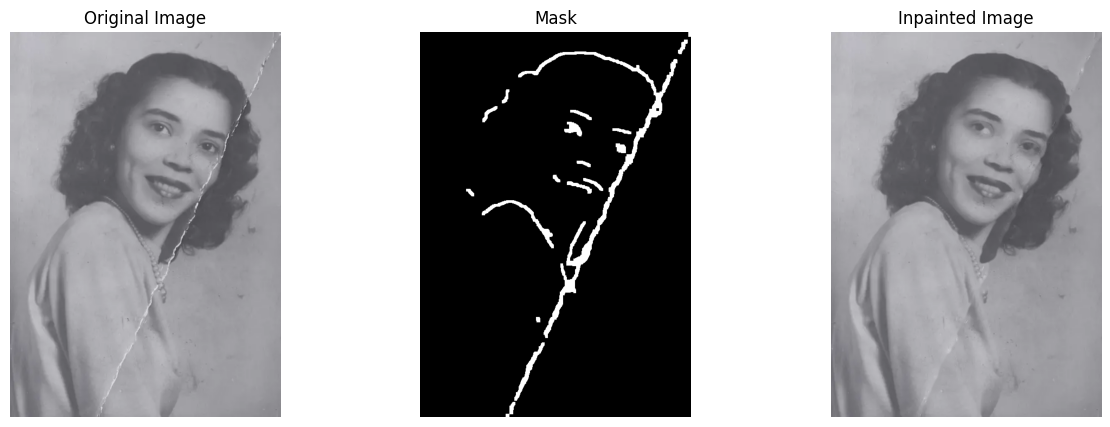

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def inpaint_old_photo(image_path):
    # Load the old photo
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Canny edge detection to create a mask for the white marks
    edges = cv2.Canny(gray, 100, 200)

    # Dilate the edges to make the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(edges, kernel, iterations=1)

    # Optionally, you can clean up the mask using morphological operations
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Inpaint the image using the mask
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Inpainted Image')
    plt.imshow(inpainted_image_rgb)
    plt.axis('off')

    plt.show()

# Input path to the old photo
image_path = 'old3.png'
inpaint_old_photo(image_path)


More complicated old photo

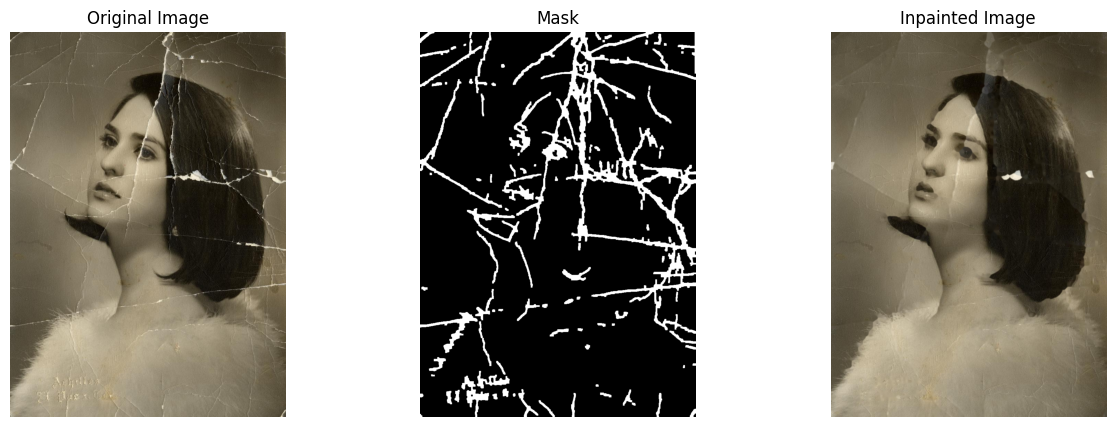

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def inpaint_old_photo(image_path):
    # Load the old photo
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Canny edge detection to create a mask for the white marks
    edges = cv2.Canny(gray, 100, 200)

    # Dilate the edges to make the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(edges, kernel, iterations=1)

    # Optionally, you can clean up the mask using morphological operations
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Inpaint the image using the mask
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Inpainted Image')
    plt.imshow(inpainted_image_rgb)
    plt.axis('off')

    plt.show()

# Input path to the old photo
image_path = 'old_photo.jpg'
inpaint_old_photo(image_path)


TELEA to remove text

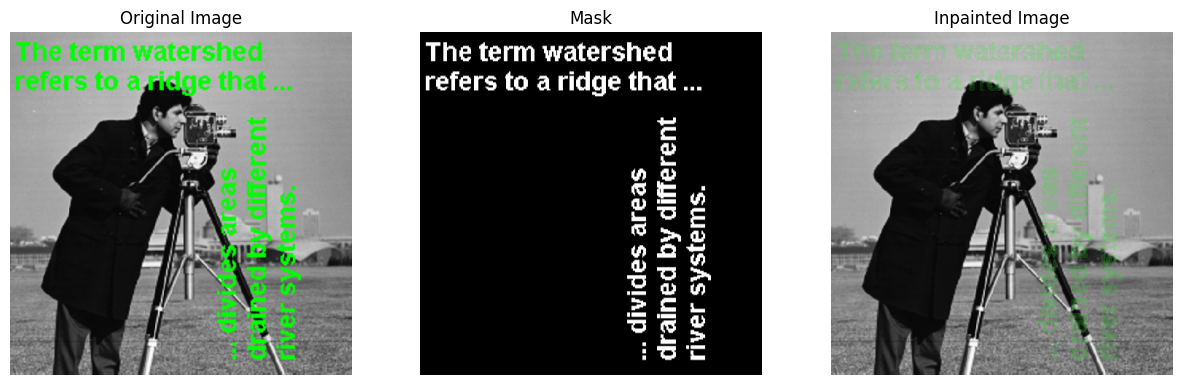

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_large_object(image_path, mask_path):
    # Load the image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the mask is binary (0 and 255)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Inpaint the segmented regions
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return inpainted_image

# Example usage
image_path = "damaged_text.png"  # Replace with the path to your image with the large object
mask_path = "damaged_text_mask.png"  # Replace with the path to the mask image
inpainted_image = remove_large_object(image_path, mask_path)

# Load the original image, mask, and inpainted image
original_image = cv2.imread(image_path)
mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Inpainted Image')
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


Navier Stroke (NS)

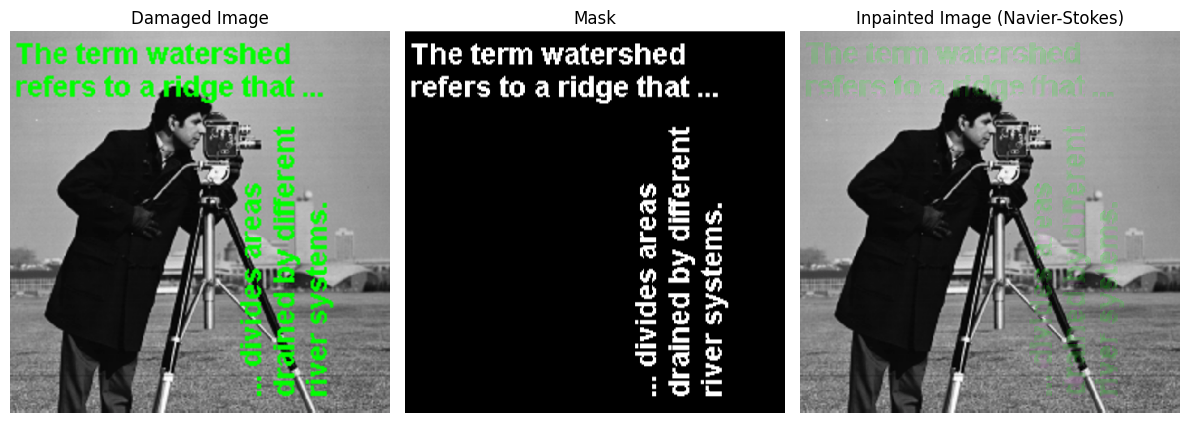

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_text(image_path, mask_path):
    # Load damaged image and mask
    damaged_img = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match the shape of the damaged image
    mask = cv2.resize(mask, (damaged_img.shape[1], damaged_img.shape[0]))

    # Inpainting with Navier-Stokes (NS) method
    inpainted_img = cv2.inpaint(damaged_img, mask, inpaintRadius=5, flags=cv2.INPAINT_NS)

    return damaged_img, mask, inpainted_img

# Example usage
damaged_image_path = "damaged_text.png"  # Replace with the path to your damaged image
mask_path = "damaged_text_mask.png"  # Replace with the path to your mask image

damaged_img, mask, inpainted_image = remove_text(damaged_image_path, mask_path)

# Display the images
plt.figure(figsize=(12, 6))

# Plot damaged image and mask
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB))
plt.title('Damaged Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

# Plot inpainted image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.title('Inpainted Image (Navier-Stokes)')
plt.axis('off')

plt.tight_layout()
plt.show()


jelasin dia sakti dimana
navier stroke: buat coretan2
telea: remove object
